# CHAPTER 2: Statistical Learning

$Y = f(X) + \epsilon$,

where:
- $Y$ is the response;
- $X = (X_1, ..., X_p)$ is a set of $p$ predictors;
- $\epsilon$ is a random error term independent from $X$ and with zero mean.


We want to estimate $f$ for $\textit{prediction}$ or $\textit{inference}$.

## Prediction

$\hat{Y} = \hat{f}(X)$,  where $\hat{f}$ is treated as a black-box function.

The accuracy of $\hat{Y}$ as a prediction of $Y$ depends on two quantities, called the $\textit{reducible error}$ and the $\textit{irreducible error}$.

The $\textit{reducible error}$ is the one arising from the mismatch between $f$ and $\hat{f}$, while the $\textit{irreducible error}$ is due to the fact that $X$ does NOT completely determine $Y$.

$\mathbb{E}\left[(Y-\hat Y)^2\right] = [f(X) -\hat{f}(X)^2] + \text{Var}(\epsilon) = \text{reducible} + \text{irreducible}$

## Inference

Interested in knowing how $Y$ changes as $X_1, ..., X_p$ change. In this case $\hat{f}$ cannot be seen as a black box, and the typical questions one tries to answer are:

- Which predictors are associated with the response? (identify the relevant ones)
- What is the relationship between the response and each predictor?
- Can it be summarized using a linear equation, or is it more complicated?

## How to estimate $f$ ?

training data = $\{(x_1, y_1), ... (x_n, y_n)\}$, where $x_i = (x_{i1}, ... x_{1p})^T$.

### Parametric Methods

Two-step model-based approach:

1) Assumptions about $f$, e.g. it is linear, so $f(X) = \beta_{0} + \beta_{1}X_1 + ...$, so that estimating $f$ becomes equivalent to estimateing the coefficients $\beta_{0}, \beta_{1}, ...$

2) Procedure to fit/train the model, e.g. Ordinary Least Squares

### Non-parametric Methods

Do not make explicit assumptions about the functional form of $f$. A very large number of training samples are required.

## Other things to consider

- Tradeoff between prediction accuracy and model interpretability

- Supervised vs unsupervised learning

- Regression vs classification problems

## Assessing Model Accuracy

- Quality of fit
- do not rely on training set results, there is no guarantee that they will reflect on test set results 
- cross validation
- degrees os freedom
- bias vs variance trade-off
- U-shape in test error

The expected test MSE can be decomposed as:

$\mathbb{E}[(y_0 - \hat{f}(x_0))^2] = \text{Var}(\hat{f}(x_0)) + [\text{Bias}(\hat{f}(x_0))]^2 + \text{Var}(\epsilon)$,

where the expected test MSE refers to the average test MSE that we would obtain if we repeatedly estimated $f$ using a large number of training sets, and tested each at $x_0$. To obtain the overall expected test MSE, compute the average over all possible $x_0$ in the test set.

**Variance** refers to the amount by which $\hat{f}$ would change if we estimated it using a different training data set.
**Bias** refers to the error that is introduced by approximating a real-life problem, which may be extremely complicated, by a much simpler model.

See also https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff.

### Classification settings

(training) error rate: $\frac{1}{n} \sum \mathbb{I}(y_i \neq \hat{y}_i)$, 

where $\hat{y}_i = \hat{f}(x_i)$ and $\mathbb{I}$ is an indicator variable that equals $1$ if the condition is true, i.e. if the prediction is wrong, $0$ otherwise.

It is possible to show that the **test** error rate is minimized, on average, by a very simple classifier (BAYES CLASSIFIER) that assigns each observation to the most likely class, given its predictor values, that is, the test set observation $x_0$ should be assigned the class $j$ for which

$$
\mathbb{P}(Y = j|X = x_0)
$$

is largest.

In general, the **Bayes error rate** (analogous to the irreducible error) is given by:

$$
1- \mathbb{E}[\max_{j}{\mathbb{P}(Y = j|X)}]
$$

In theory we would always like to predict qualitative responses using the Bayes classifier. But for real data, we do not know the conditional distribution of $Y$ given $X$, and so computing the Bayes classifier is impossible. Therefore, the Bayes classifier serves as an unattainable gold standard against which to compare other methods.

K-nearest neighbors Classifier (KNN): 
given a positive integer $K$ and a test observation $x_0$, the KNN classifier first identifies the $K$ points in the training data that are closest to $x_0$, represented by $N_0$. It then estimates the conditional probability for class $j$ as the fraction of points in $N_0$ whose response values equal $j$:

$$
\mathbb{P}(Y = j|X = x_0) = \frac{1}{K} \sum_{i \in N_0} \mathbb{I}(y_i = j),
$$

and then assigns $x_0$ the class with the largest probability. The choice of $K$ influences the variance and the bias of the model.



# LAB

In [1]:
x <- c(1, 2, 3)
x

[1] 1 2 3

In [2]:
c(1:10)

[1]  1  2  3  4  5  6  7  8  9 10

In [3]:
str(x)

 num [1:3] 1 2 3


In [4]:
y = c(1, 2, 3)

In [5]:
length(x)

[1] 3

In [6]:
ls()

[1] "x" "y"

In [7]:
x = matrix(data=c(1,2,3,4), nrow=2, ncol=2)

In [8]:
print(x)

     [,1] [,2]
[1,]    1    3
[2,]    2    4


In [9]:
print(matrix(c(1,2,3,4), 2, 2, byrow=TRUE))

     [,1] [,2]
[1,]    1    2
[2,]    3    4


In [10]:
sqrt(x)

1.000000,1.732051
1.414214,2.000000


In [11]:
print(x^2)

     [,1] [,2]
[1,]    1    9
[2,]    4   16


In [12]:
x = rnorm(50)
y = x + rnorm(50, mean=50, sd=.1) 
cor(x,y)

[1] 0.997055

In [13]:
set.seed(1303)

In [14]:
mean(x)
var(x)
sd(x)

[1] 0.08683223

[1] 0.8512831

[1] 0.92265

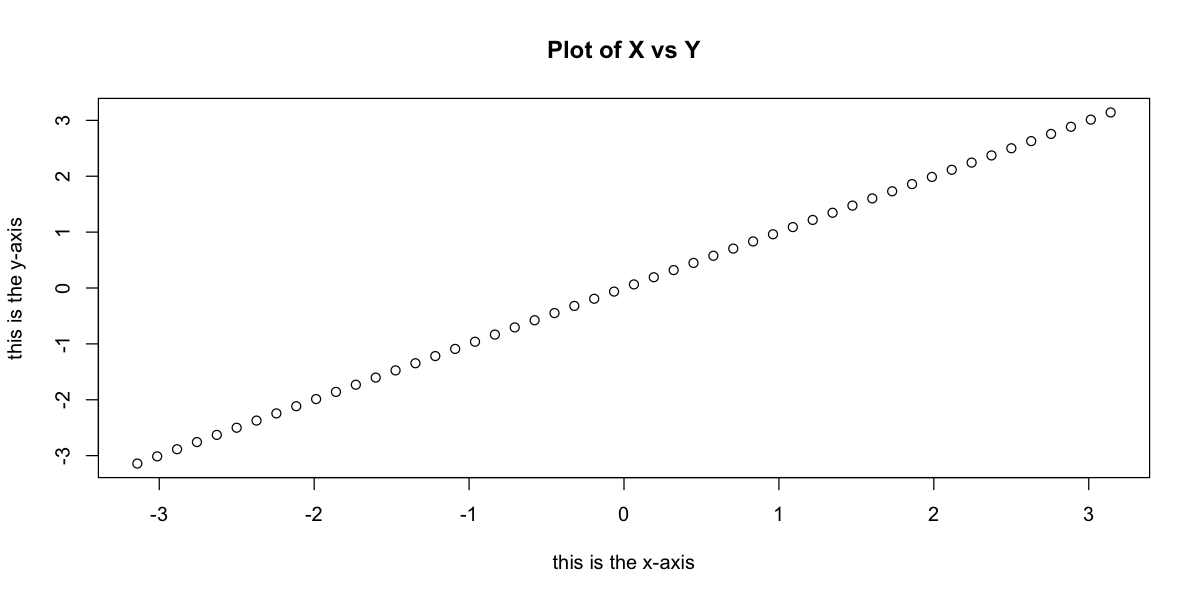

In [30]:
par(bg = 'white')
plot(x, 
     y, 
     xlab="this is the x-axis",
     ylab="this is the y-axis",
     main="Plot of X vs Y")

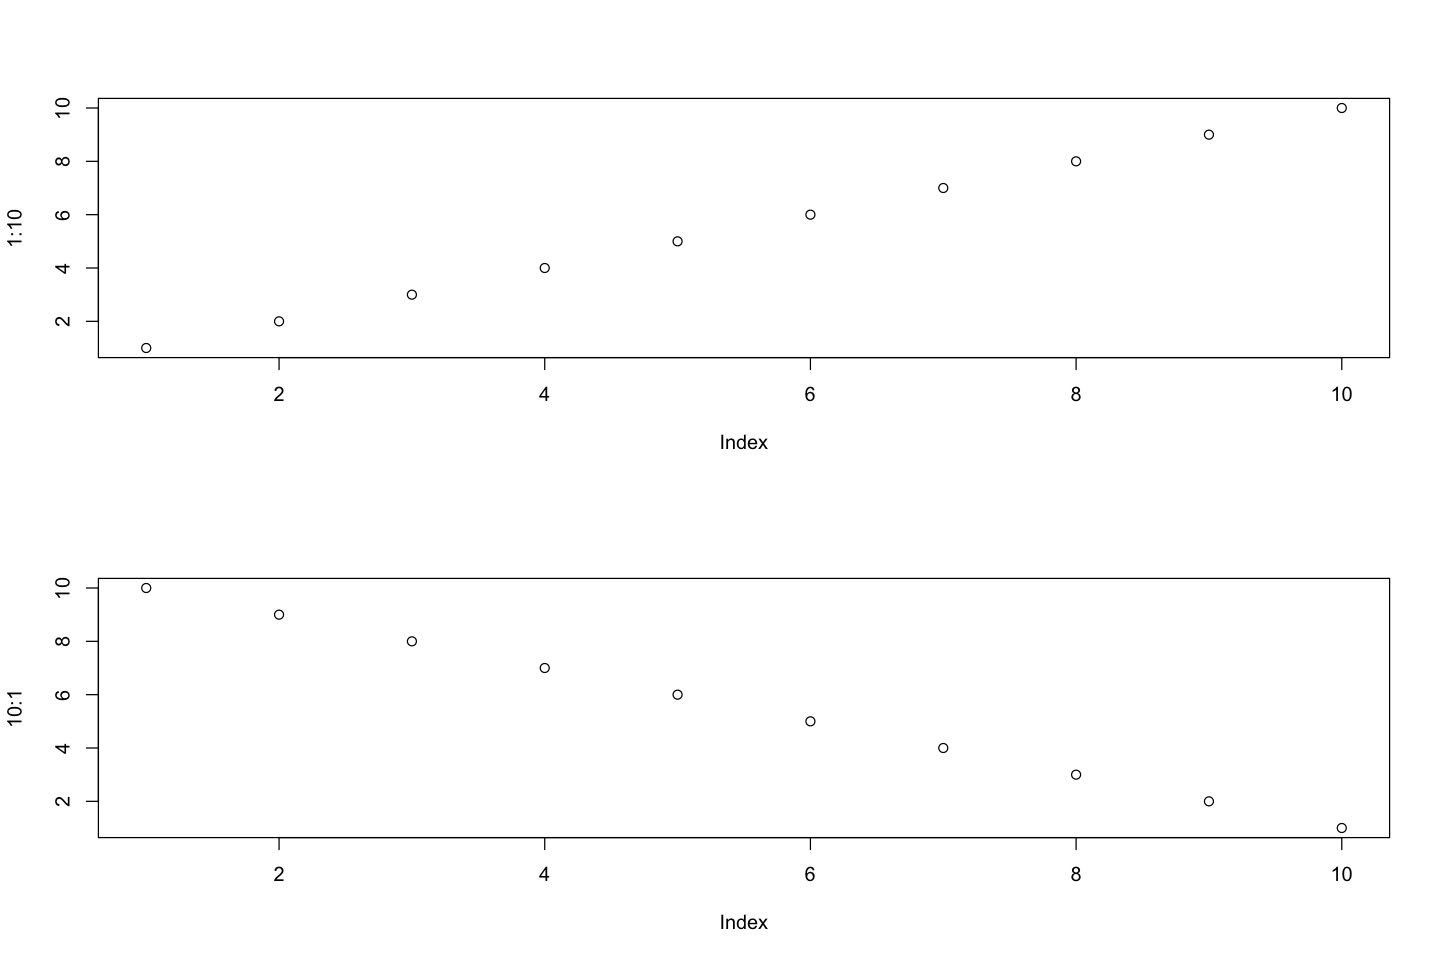

In [33]:
options(repr.plot.width=12, repr.plot.height=8)
par(bg = 'white', mfrow=c(2, 1))
plot(1:10)
plot(10:1)

In [17]:
seq(1, 10, by=2)
seq(2, 14, length=3)

[1] 1 3 5 7 9

[1]  2  8 14

In [18]:
x=seq(-pi,pi,length=50)

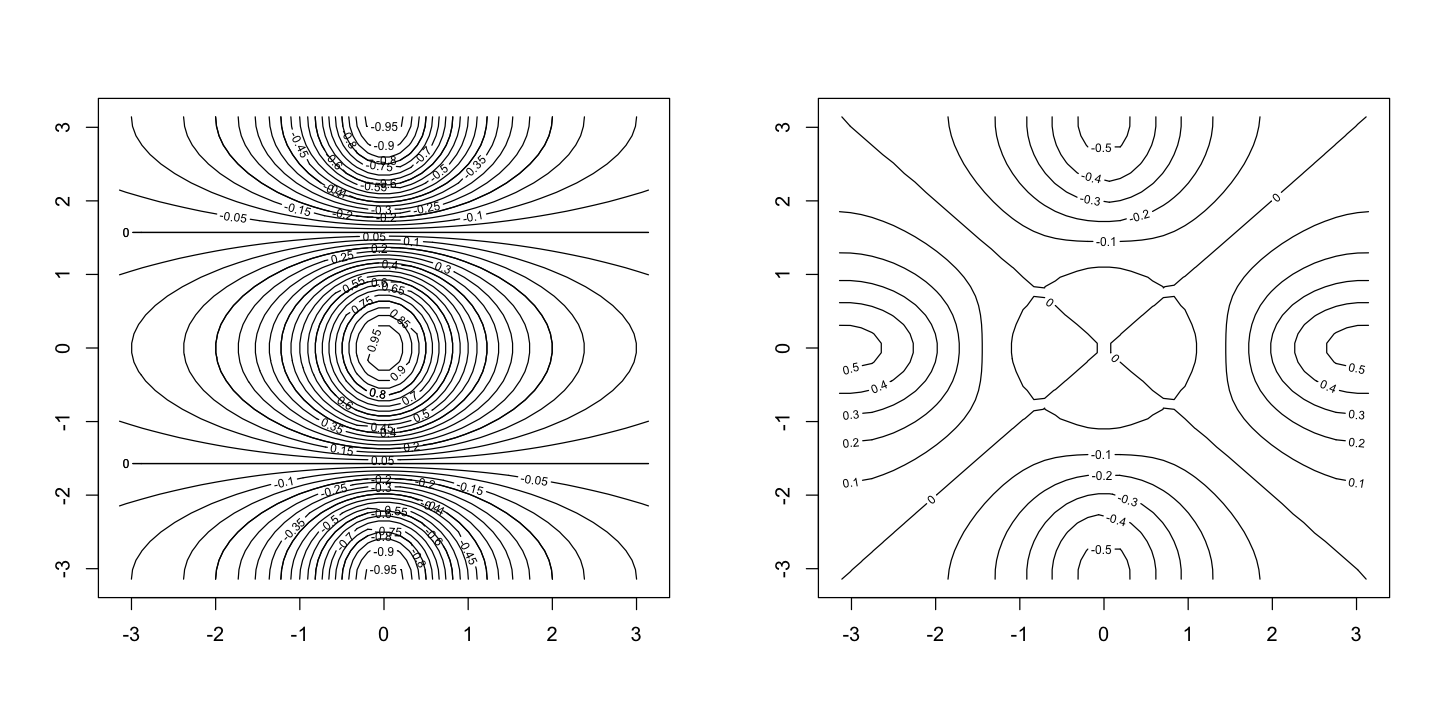

In [35]:
options(repr.plot.width=12, repr.plot.height=6)
y=x
f=outer(x, y, function(x,y)cos(y)/(1+x^2))
par(bg = 'white', mfrow=c(1, 2))
contour(x, y, f)
contour(x, y, f, nlevels=45, add=T)
fa=(f-t(f))/2
contour(x,y,fa,nlevels=15)

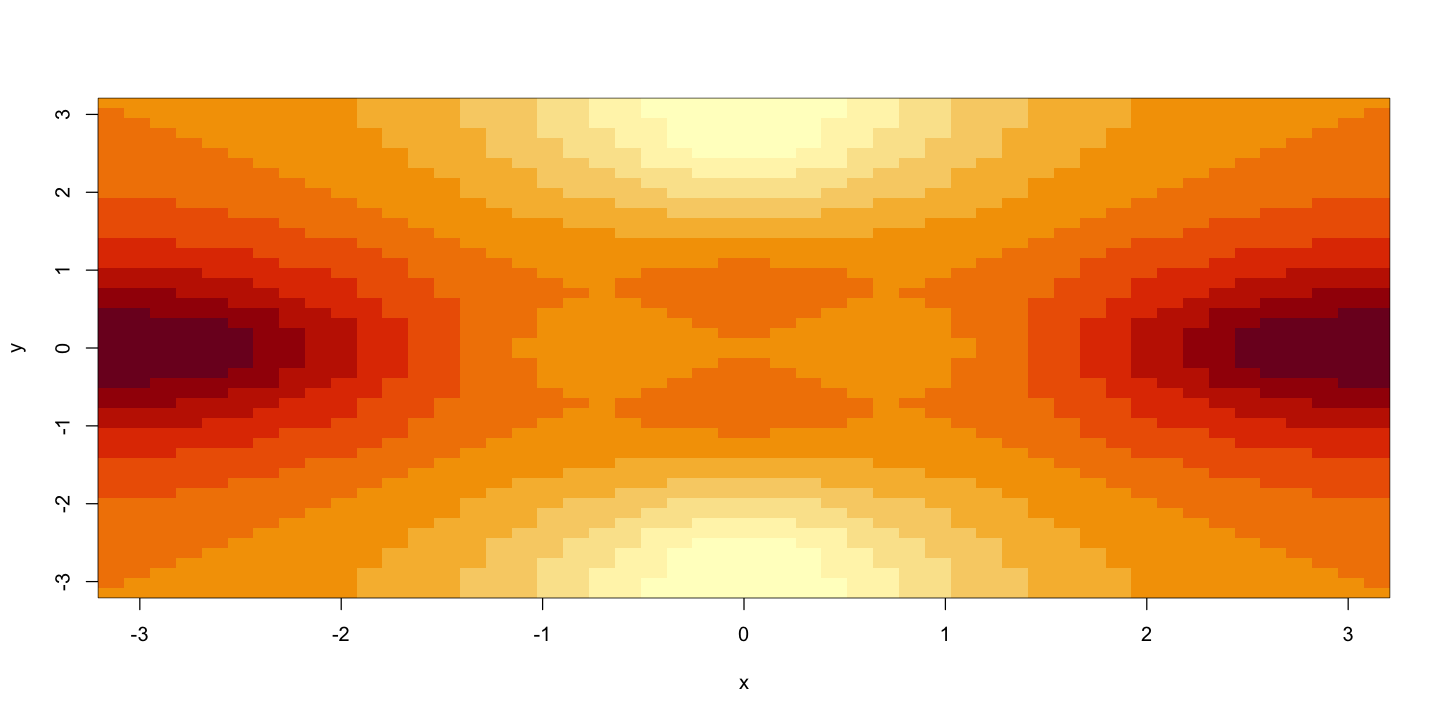

In [36]:
par(bg = 'white')
image(x,y,fa)

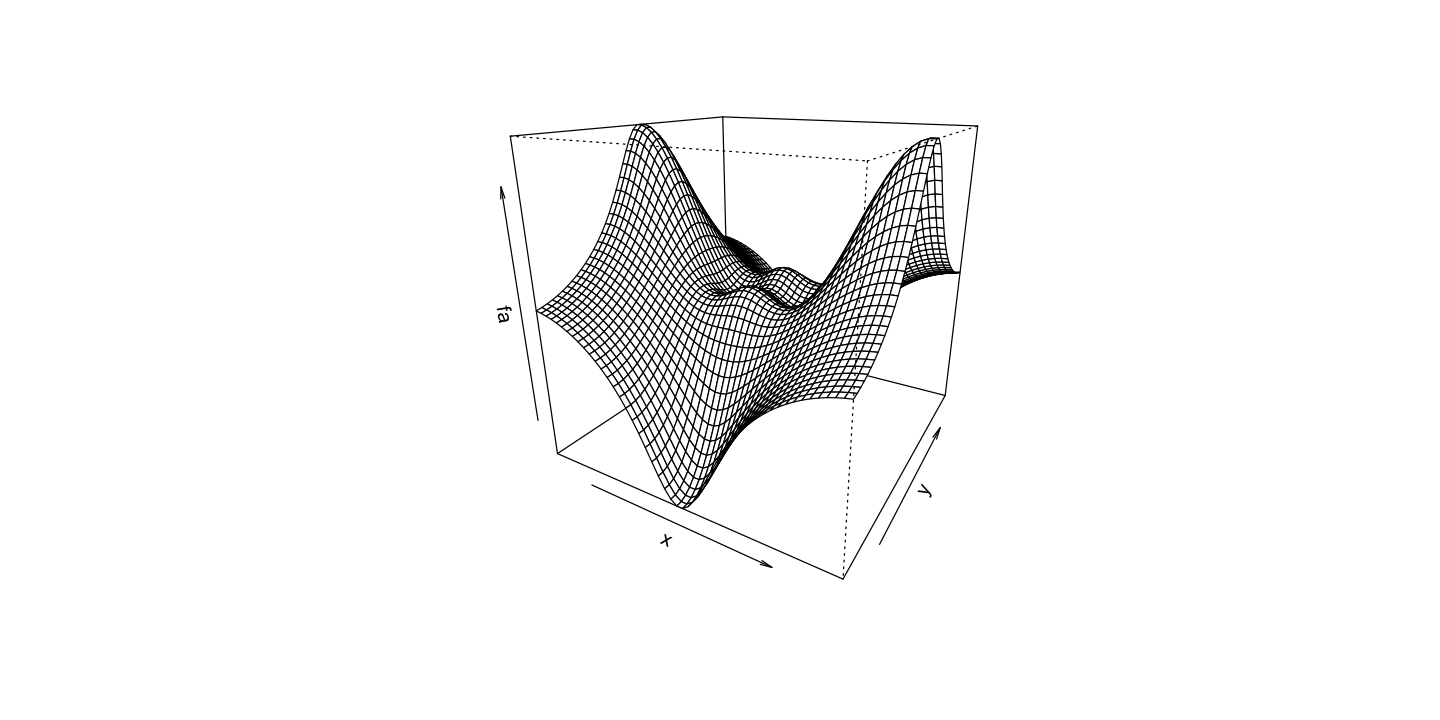

In [37]:
par(bg = 'white')
persp(x,y,fa,theta=30,phi=20)

In [39]:
A=matrix(1:16,4,4)
print(A)

     [,1] [,2] [,3] [,4]
[1,]    1    5    9   13
[2,]    2    6   10   14
[3,]    3    7   11   15
[4,]    4    8   12   16


In [53]:
A[1, c(1, 4)]

[1]  1 13

In [61]:
print(dim(A))
print(dim(A)[3])

[1] 4 4
[1] NA


In [65]:
#install.packages("ISLR")
library(ISLR)

In [66]:
head(Auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500


In [70]:
dim(Auto)
names(Auto)

[1] 392   9

[1] "mpg"          "cylinders"    "displacement" "horsepower"   "weight"      
[6] "acceleration" "year"         "origin"       "name"

In [85]:
names(Auto)[3]

[1] "displacement"

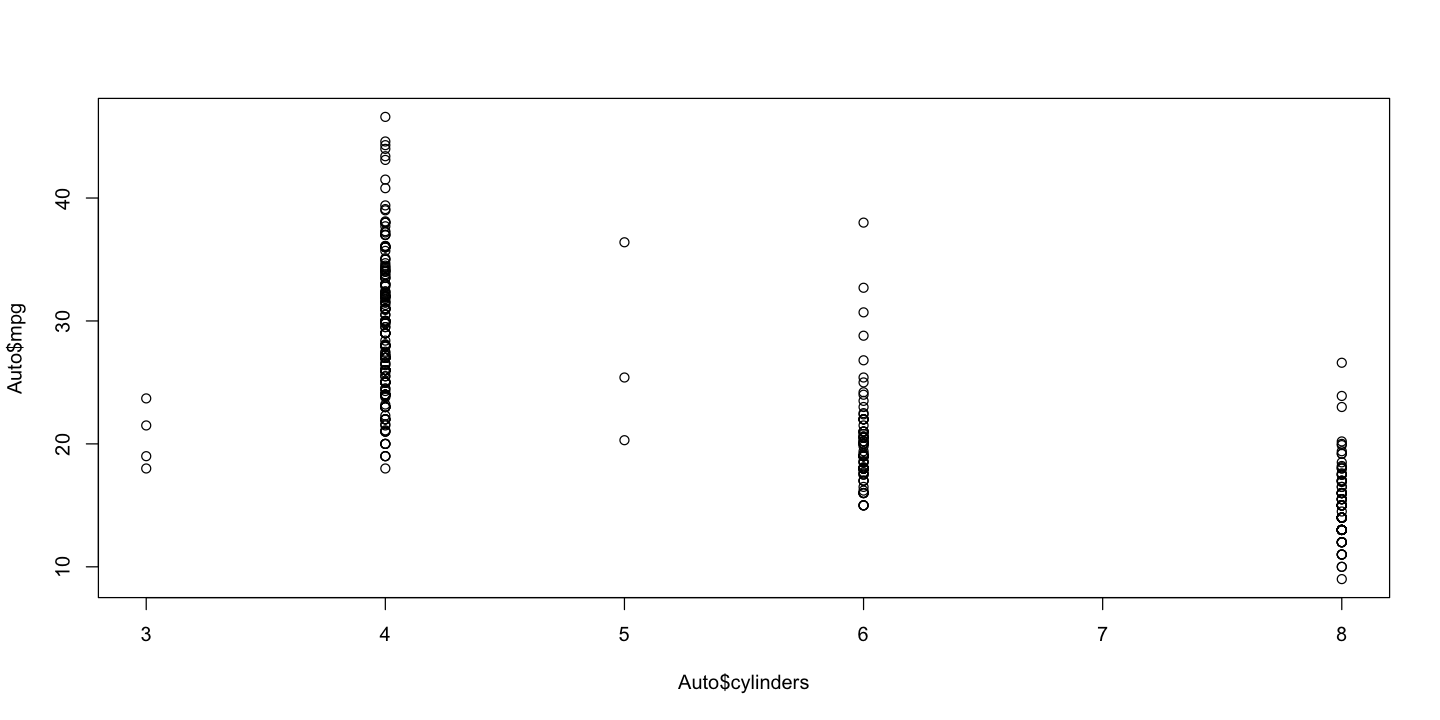

In [87]:
par(bg = 'white')
plot(Auto$cylinders, Auto$mpg)

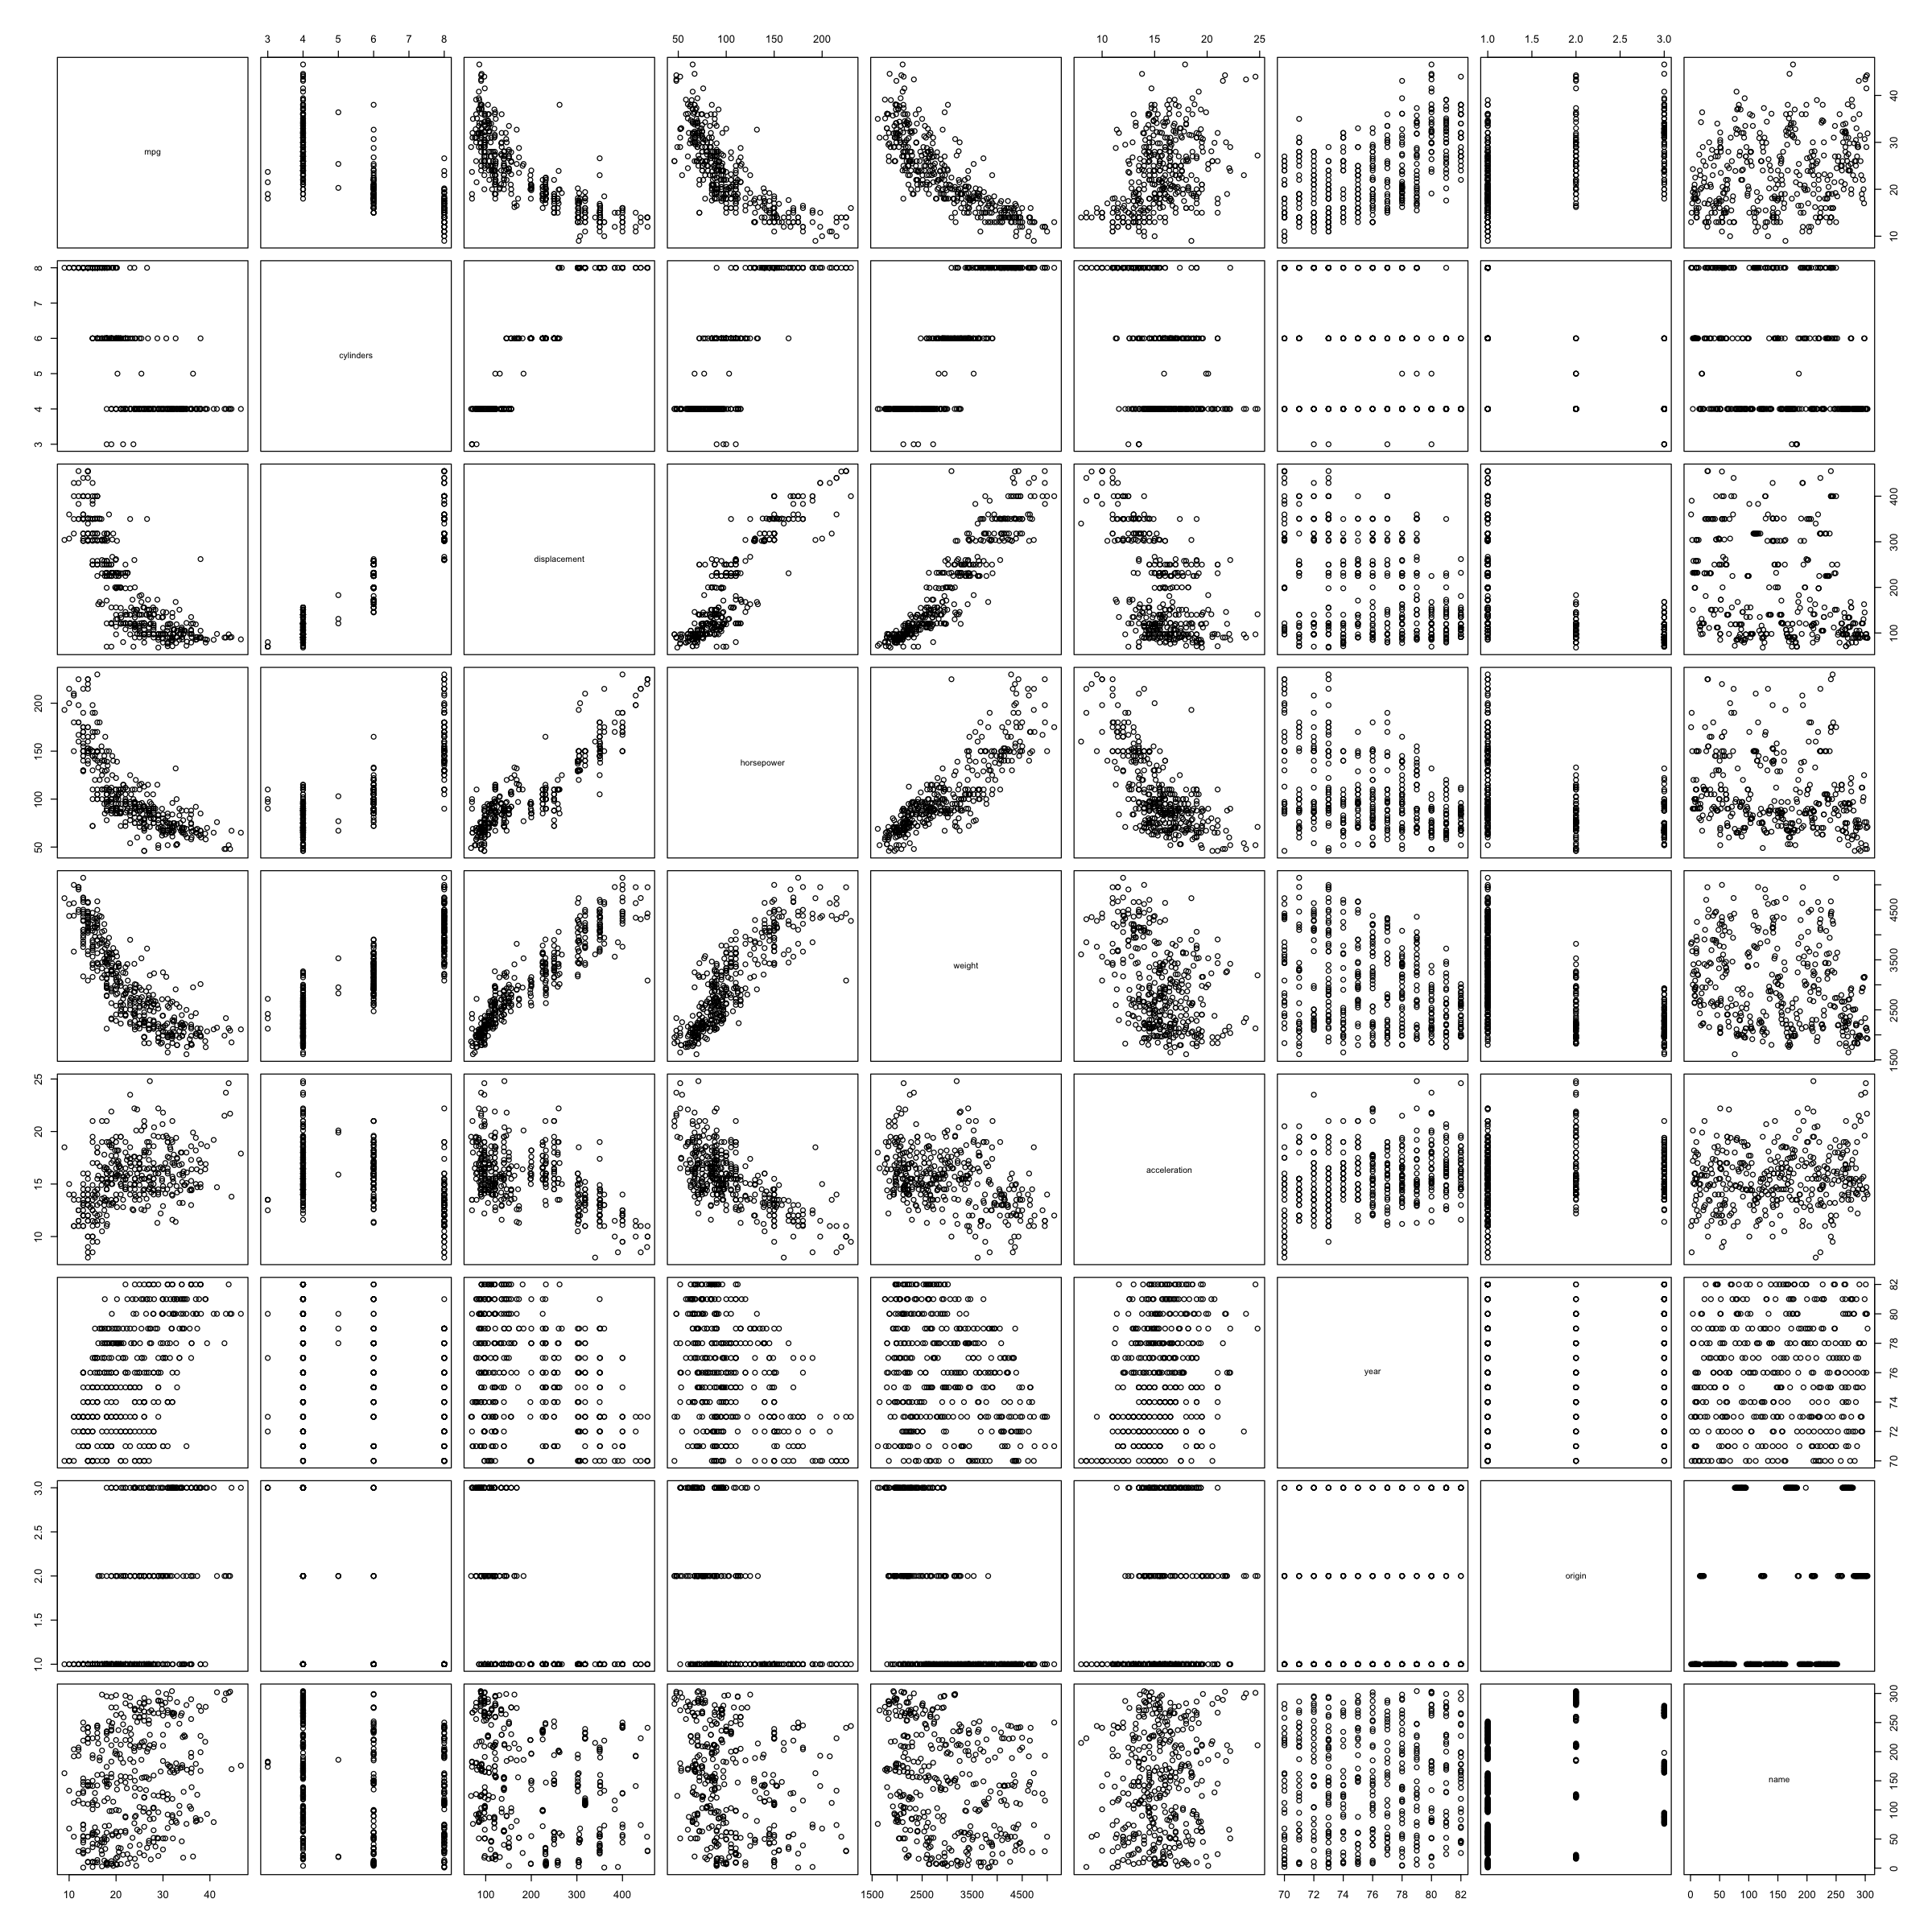

In [91]:
options(repr.plot.width=20, repr.plot.height=20)
par(bg = 'white')
pairs(Auto)

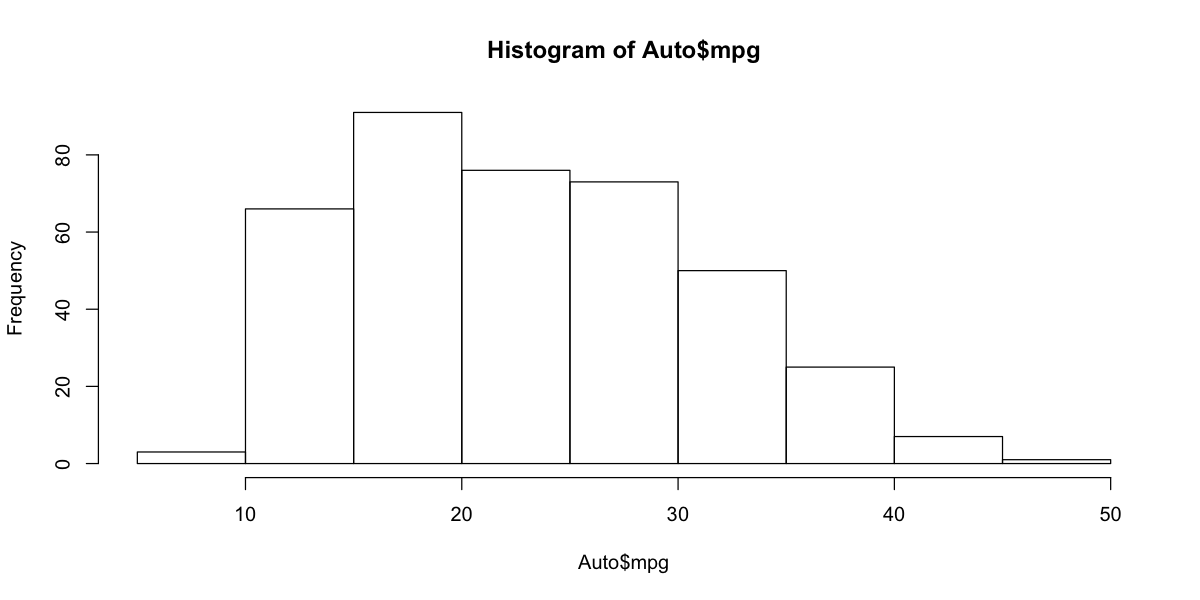

In [100]:
options(repr.plot.width=10, repr.plot.height=5)
par(bg = 'white')
hist(Auto$mpg, breaks=12)

In [113]:
summary(Auto)

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                               
  acceleration        year           origin                      name    
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   amc matador       :  5  
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000   ford pinto        :  5  
 Median :15.50   Median :76.00   Median :1.000   toyota corolla    :  5  
 Mean   :15.54   Mean   :75.98   Mean   :1.577   amc gremlin    

In [ ]:
fix()